In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV

In [ ]:
dat = pd.read_csv('Hitters.csv')

In [ ]:
dat.dropna()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [ ]:
dat.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [ ]:
X = dat.drop(["Salary"], axis = 1)
y = dat["Salary"]


In [ ]:
#Got rid of all rows that were NA in salary
mask = ~pd.isna(y)
X_clean = X[mask]
y_clean = y[mask]

X = X_clean
y = y_clean


In [ ]:
numeric = X.select_dtypes(include={np.number}).columns

#PART 1

#Part A
Regular regression

In [ ]:
#Part 1 #1

ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["League","Division","NewLeague"]),
    ("Standardize", StandardScaler(), numeric)
  ],
  remainder = "passthrough"
)


lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

lr_pipeline_fit = lr_pipeline.fit(X, y)

y_pred = lr_pipeline_fit.predict(X)

r2lin = r2_score(y, y_pred)

coef = lr_pipeline_fit.named_steps["linear_regression"].coef_
intercept = lr_pipeline_fit.named_steps["linear_regression"].intercept_


In [ ]:
lr_pipeline_fit.named_steps["preprocessing"].get_feature_names_out()


array(['dummify__League_A', 'dummify__League_N', 'dummify__Division_E',
       'dummify__Division_W', 'dummify__NewLeague_A',
       'dummify__NewLeague_N', 'Standardize__AtBat', 'Standardize__Hits',
       'Standardize__HmRun', 'Standardize__Runs', 'Standardize__RBI',
       'Standardize__Walks', 'Standardize__Years', 'Standardize__CAtBat',
       'Standardize__CHits', 'Standardize__CHmRun', 'Standardize__CRuns',
       'Standardize__CRBI', 'Standardize__CWalks', 'Standardize__PutOuts',
       'Standardize__Assists', 'Standardize__Errors'], dtype=object)

In [ ]:
intercept, coef

(np.float64(537.9273144423053),
 array([ -31.299712,   31.299712,   58.424623,  -58.424623,   12.381163,
         -12.381163, -291.094556,  337.830479,   37.853837,  -60.572479,
         -26.994984,  135.073897,  -16.693359, -391.038655,   86.687617,
         -14.181723,  480.747135,  260.689886, -213.892259,   78.761296,
          53.73249 ,  -22.160862]))

2
It looks like standardize_CRuns with an one run increasing salary by around 480.74 and standardize__Hits increasing salary by $337.83.
On the other side, it looks like Standardize__CAtBat would decrease salary by -391.03 per one

In [ ]:
#3
cv_scores = cross_val_score(estimator=lr_pipeline, X=X, y=y, scoring='neg_mean_squared_error', cv=5 )
mse_score = -cv_scores
mse_score.mean()

np.float64(121136.31031816888)

#Part B
Ridge Regression

In [ ]:
numeric = X.select_dtypes(include={np.number}).columns

In [ ]:
#1
ct1 = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["League","Division","NewLeague"]),
    ("Standardize", StandardScaler(), numeric)
  ],
  remainder = "passthrough"

  )

pipelineridge = Pipeline(
  [("preprocessing", ct1),
  ("Ridgeregression", Ridge(alpha = 100))]
)
pipeline_fit = pipelineridge.fit(X, y)

y_pred = pipeline_fit.predict(X)


coef = pipeline_fit.named_steps["Ridgeregression"].coef_
intercept = pipeline_fit.named_steps["Ridgeregression"].intercept_

In [ ]:
print(intercept)
print(coef)

537.5746804284508
[-11.051842  11.051842  38.023222 -38.023222  -4.09159    4.09159
  -0.56737   49.612386  -1.464159  29.343263  22.958015  41.384617
  -2.708306  24.705844  44.534276  38.68533   45.507606  47.145556
   4.036371  56.881522   7.457239 -13.38239 ]


In [ ]:
#2
alpha = {'Ridgeregression__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

ridge_cv = GridSearchCV(estimator=pipelineridge, param_grid= alpha,cv=10,scoring='r2')

ridge_cv.fit(X, y)

#Found the best_params_/best_score_ functions to easily identify which alpha is the best
bestalpha = ridge_cv.best_params_
bestscore = ridge_cv.best_score_

In [ ]:
print(bestalpha)
print(bestscore)

{'Ridgeregression__alpha': 100}
0.3867487741686936


In [ ]:
#3
ct2 = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["League","Division","NewLeague"]),
    ("Standardize", StandardScaler(), numeric)
  ],
  remainder = "passthrough"

  )

pipelineridgebest = Pipeline(
  [("preprocessing", ct2),
  ("Ridgeregression", Ridge(alpha = 100))]
)

pipeline_fitb = pipelineridgebest.fit(X, y)

y_pred = pipeline_fitb.predict(X)

coef = pipeline_fitb.named_steps["Ridgeregression"].coef_
intercept = pipeline_fitb.named_steps["Ridgeregression"].intercept_

In [ ]:
print(coef)
print(intercept)

[-11.051842  11.051842  38.023222 -38.023222  -4.09159    4.09159
  -0.56737   49.612386  -1.464159  29.343263  22.958015  41.384617
  -2.708306  24.705844  44.534276  38.68533   45.507606  47.145556
   4.036371  56.881522   7.457239 -13.38239 ]
537.5746804284508


In [ ]:
#should be the same coefficeints even though its for the lr
lr_pipeline_fit.named_steps["preprocessing"].get_feature_names_out()


array(['dummify__League_A', 'dummify__League_N', 'dummify__Division_E',
       'dummify__Division_W', 'dummify__NewLeague_A',
       'dummify__NewLeague_N', 'Standardize__AtBat', 'Standardize__Hits',
       'Standardize__HmRun', 'Standardize__Runs', 'Standardize__RBI',
       'Standardize__Walks', 'Standardize__Years', 'Standardize__CAtBat',
       'Standardize__CHits', 'Standardize__CHmRun', 'Standardize__CRuns',
       'Standardize__CRBI', 'Standardize__CWalks', 'Standardize__PutOuts',
       'Standardize__Assists', 'Standardize__Errors'], dtype=object)

It Looks like Standardize__CRuns is still one of the most important coeffcients with an impact of 480.42 and Standardize__CRBI is also important with an increase of 260.45 to salary

In [ ]:
#4
cv_scores1 = cross_val_score(estimator=pipelineridgebest, X=X, y=y, scoring='neg_mean_squared_error', cv=5 )
mse_score = -cv_scores1
mse_score.mean()

np.float64(120716.43558937621)

#Part C
Lasso Regression

In [ ]:
#1
ct3 = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["League","Division","NewLeague"]),
    ("Standardize", StandardScaler(), numeric)
  ],
  remainder = "passthrough"

  )

pipelinelasso = Pipeline(
  [("preprocessing", ct3),
  ("Lassoregression", Lasso(alpha = 1))]
)

pipeline_fit = pipelinelasso.fit(X, y)

y_pred = pipeline_fit.predict(X)

r2 = r2_score(y, y_pred)

coef = pipeline_fit.named_steps["Lassoregression"].coef_
intercept = pipeline_fit.named_steps["Lassoregression"].intercept_

In [ ]:
print(intercept)
np.set_printoptions(suppress=True, precision=6)
print(coef)

498.7416742480892
[ -35.826072    0.        114.412951   -0.          0.         -0.
 -282.370957  304.359509   11.127022  -24.966507   -0.        120.695275
  -34.948148 -162.639794    0.         14.225993  375.565519  192.610892
 -189.644642   78.760366   41.99668   -18.479378]


In [ ]:
lr_pipeline_fit.named_steps["preprocessing"].get_feature_names_out()


array(['dummify__League_A', 'dummify__League_N', 'dummify__Division_E',
       'dummify__Division_W', 'dummify__NewLeague_A',
       'dummify__NewLeague_N', 'Standardize__AtBat', 'Standardize__Hits',
       'Standardize__HmRun', 'Standardize__Runs', 'Standardize__RBI',
       'Standardize__Walks', 'Standardize__Years', 'Standardize__CAtBat',
       'Standardize__CHits', 'Standardize__CHmRun', 'Standardize__CRuns',
       'Standardize__CRBI', 'Standardize__CWalks', 'Standardize__PutOuts',
       'Standardize__Assists', 'Standardize__Errors'], dtype=object)

In [ ]:
#2
alpha = {'Lassoregression__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

ridge_cv = GridSearchCV(estimator=pipelinelasso, param_grid= alpha,cv=10,scoring='r2')

ridge_cv.fit(X, y)

bestalpha = ridge_cv.best_params_
bestscore = ridge_cv.best_score_

In [ ]:
print(bestalpha)
print(bestscore)

{'Lassoregression__alpha': 10}
0.3796928034571739


In [ ]:
#3
ct3 = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["League","Division","NewLeague"]),
    ("Standardize", StandardScaler(), numeric)
  ],
  remainder = "passthrough"

  )

pipelinelassob = Pipeline(
  [("preprocessing", ct3),
  ("Lassoregression", Lasso(alpha = 10))]
)

pipeline_fit = pipelinelassob.fit(X, y)

y_pred = pipeline_fit.predict(X)

r2l = r2_score(y, y_pred)

coef = pipeline_fit.named_steps["Lassoregression"].coef_
intercept = pipeline_fit.named_steps["Lassoregression"].intercept_

In [ ]:
np.set_printoptions(suppress=True, precision=6)
print(coef)
print(intercept)

[ -0.         0.        95.413203  -0.        -0.         0.
  -0.        88.741627   0.         0.         0.        49.902813
  -0.         0.         0.         0.        72.227529 134.032027
  -0.        66.737006   0.        -4.158281]
489.12625015207044


In [ ]:
lr_pipeline_fit.named_steps["preprocessing"].get_feature_names_out()


array(['dummify__League_A', 'dummify__League_N', 'dummify__Division_E',
       'dummify__Division_W', 'dummify__NewLeague_A',
       'dummify__NewLeague_N', 'Standardize__AtBat', 'Standardize__Hits',
       'Standardize__HmRun', 'Standardize__Runs', 'Standardize__RBI',
       'Standardize__Walks', 'Standardize__Years', 'Standardize__CAtBat',
       'Standardize__CHits', 'Standardize__CHmRun', 'Standardize__CRuns',
       'Standardize__CRBI', 'Standardize__CWalks', 'Standardize__PutOuts',
       'Standardize__Assists', 'Standardize__Errors'], dtype=object)

In [ ]:
r2l

0.4848787186109814

In [ ]:
#4
cv_scores1 = cross_val_score(estimator=pipelinelassob, X=X, y=y, scoring='neg_mean_squared_error', cv=5 )
mse_score = -cv_scores1
mse_score.mean()

np.float64(121828.14133338635)

#Part D
Elastic net

In [ ]:
#1
ct4 = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["League","Division","NewLeague"]),
    ("Standardize", StandardScaler(), numeric)
  ],
  remainder = "passthrough"

  )

pipelineelastic = Pipeline(
  [("preprocessing", ct4),
  ("Elasticregression", ElasticNet(alpha = 10, l1_ratio = 0.5))]
)

pipeline_fit = pipelineelastic.fit(X, y)

y_pred = pipeline_fit.predict(X)

r2 = r2_score(y, y_pred)

coef = pipeline_fit.named_steps["Elasticregression"].coef_
intercept = pipeline_fit.named_steps["Elasticregression"].intercept_

In [ ]:
print(intercept)
print(coef)

536.0688008694923
[-0.300426  0.300424  5.943056 -5.943055 -0.177148  0.177149 13.682465
 17.845703 10.236544 16.035292 16.105234 17.871101 11.949768 18.230818
 20.123806 18.813751 20.651203 20.843694 16.087166 15.93418   0.306664
 -0.189629]


In [ ]:
#2
alpha = {'Elasticregression__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

ridge_cv = GridSearchCV(estimator=pipelineelastic, param_grid= alpha,cv=10,scoring='r2')

ridge_cv.fit(X, y)

bestalpha = ridge_cv.best_params_
bestscore = ridge_cv.best_score_

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.049e+07, tolerance: 5.077e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.147e+07, tolerance: 4.958e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.993e+06, tolerance: 4.119e

In [ ]:
print(bestalpha)
print(bestscore)

{'Elasticregression__alpha': 1}
0.3878366812532099


In [ ]:
#3
ct4 = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["League","Division","NewLeague"]),
    ("Standardize", StandardScaler(), numeric)
  ],
  remainder = "passthrough"

  )

pipelineelasticbest = Pipeline(
  [("preprocessing", ct4),
  ("Elasticregressionb", ElasticNet(alpha = 1, l1_ratio = 0.5))]
)

pipeline_fit = pipelineelasticbest.fit(X, y)

y_pred = pipeline_fit.predict(X)

r2e = r2_score(y, y_pred)

coef = pipeline_fit.named_steps["Elasticregressionb"].coef_
intercept = pipeline_fit.named_steps["Elasticregressionb"].intercept_

In [ ]:
print(intercept)
print(coef)

537.3730131312799
[ -9.240169   9.240219  33.206605 -33.206569  -3.998792   3.998841
   5.318014  44.468922   1.045083  28.497641  23.026819  38.718826
   1.572003  25.466795  41.064251  36.065127  41.95765   43.362849
   9.241419  52.50161    5.304079 -10.715026]


In [ ]:
lr_pipeline_fit.named_steps["preprocessing"].get_feature_names_out()


array(['dummify__League_A', 'dummify__League_N', 'dummify__Division_E',
       'dummify__Division_W', 'dummify__NewLeague_A',
       'dummify__NewLeague_N', 'Standardize__AtBat', 'Standardize__Hits',
       'Standardize__HmRun', 'Standardize__Runs', 'Standardize__RBI',
       'Standardize__Walks', 'Standardize__Years', 'Standardize__CAtBat',
       'Standardize__CHits', 'Standardize__CHmRun', 'Standardize__CRuns',
       'Standardize__CRBI', 'Standardize__CWalks', 'Standardize__PutOuts',
       'Standardize__Assists', 'Standardize__Errors'], dtype=object)

In [ ]:
r2e

0.47065216632654583

In [ ]:
#4
cv_scores3 = cross_val_score(estimator= pipelineelasticbest, X=X, y=y, scoring='neg_mean_squared_error', cv=5 )
mse_score = -cv_scores3
mse_score.mean()

np.float64(120775.68540066632)

#Part 2
Variable section

#Most important numeric variable
Most important Linreg Model: CRuns 480.74
Most important Ridge Model: PutOuts 56.88
Most important lasso Model: CRuns 375.56
Most important Elastic Model: PutOuts 52.50

#5 most important numeric and most important cat variable

Linear reg: CRBI 260.6, CRuns 480.74, CAtBat -391.03, AtBat -291.09, Hits 337
Cat: Division E

Ridge: PutOuts 56.88, Hits 49.6, CRBI 47.14, CRuns 45.5, CHits 44.53
Cat: Division E

Lasso: CRBI 192.61, CRuns 375.56 Hits 304.35, AtBat -282.82, CWalks -189.64
Cat: Division E

Elastic: PutOuts 52.50, Hits 44.4, CRBI 43.3, CRuns 41.95, CHits 41.06
Division E


In [ ]:
X = dat[["CRuns"]]
y = dat["Salary"]
numeric = X.select_dtypes(include={np.number}).columns
mask = ~pd.isna(y)
X_clean = X[mask]
y_clean = y[mask]

X = X_clean
y = y_clean

In [ ]:
#Part 2 #1
#Linear Regression
ctf = ColumnTransformer(
  [
    ("Standardize", StandardScaler(), numeric)
  ],
  remainder = "passthrough"
)


lr_pipeline = Pipeline(
  [("preprocessing", ctf),
  ("linear_regression", LinearRegression())]
)

lr_pipeline_fit = lr_pipeline.fit(X, y)

y_pred = lr_pipeline_fit.predict(X)

r2lin = r2_score(y, y_pred)

coef = lr_pipeline_fit.named_steps["linear_regression"].coef_
intercept = lr_pipeline_fit.named_steps["linear_regression"].intercept_


In [ ]:
cv_scoresf = cross_val_score(estimator= lr_pipeline, X=X, y=y, scoring='neg_mean_squared_error', cv=5 )
mse_score = -cv_scoresf
mse_score.mean()

np.float64(143812.9359162973)

In [ ]:
#Ridge Regression
ct1 = ColumnTransformer(
  [
    ("Standardize", StandardScaler(), numeric)
  ],
  remainder = "passthrough"

  )

pipelineridge = Pipeline(
  [("preprocessing", ct1),
  ("Ridgeregression", Ridge(alpha = 100))]
)
pipeline_fit = pipelineridge.fit(X, y)

y_pred = pipeline_fit.predict(X)


coef = pipeline_fit.named_steps["Ridgeregression"].coef_
intercept = pipeline_fit.named_steps["Ridgeregression"].intercept_

In [ ]:
alpha = {'Ridgeregression__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

ridge_cv = GridSearchCV(estimator=pipelineridge, param_grid= alpha,cv=10,scoring='r2')

ridge_cv.fit(X, y)

#Found the best_params_/best_score_ functions to easily identify which alpha is the best
bestalpha = ridge_cv.best_params_
bestscore = ridge_cv.best_score_

In [ ]:
bestalpha

{'Ridgeregression__alpha': 10}

In [ ]:
ct1 = ColumnTransformer(
  [
    ("Standardize", StandardScaler(), numeric)
  ],
  remainder = "passthrough"

  )

pipelineridge = Pipeline(
  [("preprocessing", ct1),
  ("Ridgeregression", Ridge(alpha = 10))]
)
pipeline_fit = pipelineridge.fit(X, y)

y_pred = pipeline_fit.predict(X)


coef = pipeline_fit.named_steps["Ridgeregression"].coef_
intercept = pipeline_fit.named_steps["Ridgeregression"].intercept_

In [ ]:
cv_scoresr = cross_val_score(estimator= pipelineridge, X=X, y=y, scoring='neg_mean_squared_error', cv=5 )
mse_score = -cv_scoresr
mse_score.mean()

np.float64(143658.5173685888)

In [ ]:
#Lasso
ct3 = ColumnTransformer(
  [
    ("Standardize", StandardScaler(), numeric)
  ],
  remainder = "passthrough"

  )

pipelinelasso = Pipeline(
  [("preprocessing", ct3),
  ("Lassoregression", Lasso(alpha = 1))]
)

pipeline_fit = pipelinelasso.fit(X, y)

y_pred = pipeline_fit.predict(X)

r2 = r2_score(y, y_pred)

coef = pipeline_fit.named_steps["Lassoregression"].coef_
intercept = pipeline_fit.named_steps["Lassoregression"].intercept_

In [ ]:
alpha = {'Lassoregression__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

ridge_cv = GridSearchCV(estimator=pipelinelasso, param_grid= alpha,cv=10,scoring='r2')

ridge_cv.fit(X, y)

bestalpha = ridge_cv.best_params_
bestscore = ridge_cv.best_score_

In [ ]:
bestalpha

{'Lassoregression__alpha': 10}

In [ ]:
ct3 = ColumnTransformer(
  [
    ("Standardize", StandardScaler(), numeric)
  ],
  remainder = "passthrough"

  )

pipelinelasso = Pipeline(
  [("preprocessing", ct3),
  ("Lassoregression", Lasso(alpha = 10))]
)

pipeline_fit = pipelinelasso.fit(X, y)

y_pred = pipeline_fit.predict(X)

r2 = r2_score(y, y_pred)

coef = pipeline_fit.named_steps["Lassoregression"].coef_
intercept = pipeline_fit.named_steps["Lassoregression"].intercept_

In [ ]:
cv_scoresl = cross_val_score(estimator= pipelinelasso, X=X, y=y, scoring='neg_mean_squared_error', cv=5 )
mse_score = -cv_scoresl
mse_score.mean()

np.float64(143793.4491585397)

In [ ]:
#Elastic Net
ct4 = ColumnTransformer(
  [
    ("Standardize", StandardScaler(), numeric)
  ],
  remainder = "passthrough"

  )

pipelineelastic = Pipeline(
  [("preprocessing", ct4),
  ("Elasticregression", ElasticNet(alpha = 10, l1_ratio = 0.5))]
)

pipeline_fit = pipelineelastic.fit(X, y)

y_pred = pipeline_fit.predict(X)

r2 = r2_score(y, y_pred)

coef = pipeline_fit.named_steps["Elasticregression"].coef_
intercept = pipeline_fit.named_steps["Elasticregression"].intercept_

In [ ]:
alpha = {'Elasticregression__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

ridge_cv = GridSearchCV(estimator=pipelineelastic, param_grid= alpha,cv=10,scoring='r2')

ridge_cv.fit(X, y)

bestalpha = ridge_cv.best_params_
bestscore = ridge_cv.best_score_

In [ ]:
bestalpha

{'Elasticregression__alpha': 0.1}

In [ ]:
ct4 = ColumnTransformer(
  [
    ("Standardize", StandardScaler(), numeric)
  ],
  remainder = "passthrough"

  )

pipelineelastic = Pipeline(
  [("preprocessing", ct4),
  ("Elasticregression", ElasticNet(alpha = 0.1, l1_ratio = 0.5))]
)

pipeline_fit = pipelineelastic.fit(X, y)

y_pred = pipeline_fit.predict(X)

r2 = r2_score(y, y_pred)

coef = pipeline_fit.named_steps["Elasticregression"].coef_
intercept = pipeline_fit.named_steps["Elasticregression"].intercept_

In [ ]:
cv_scoresen = cross_val_score(estimator= pipelineelastic, X=X, y=y, scoring='neg_mean_squared_error', cv=5 )
mse_score = -cv_scoresen
mse_score.mean()

np.float64(143655.07604766646)

In [ ]:
X = dat[["CRuns", "CRBI", "Hits", "PutOuts", "CHits"]]
y = dat["Salary"]
numeric = X.select_dtypes(include={np.number}).columns
mask = ~pd.isna(y)
X_clean = X[mask]
y_clean = y[mask]

X = X_clean
y = y_clean

In [ ]:
#Linear regression best #5
ctf = ColumnTransformer(
  [
    ("Standardize", StandardScaler(), numeric)
  ],
  remainder = "passthrough"
)


lr_pipeline = Pipeline(
  [("preprocessing", ctf),
  ("linear_regression", LinearRegression())]
)

lr_pipeline_fit = lr_pipeline.fit(X, y)

y_pred = lr_pipeline_fit.predict(X)

r2lin = r2_score(y, y_pred)

coef = lr_pipeline_fit.named_steps["linear_regression"].coef_
intercept = lr_pipeline_fit.named_steps["linear_regression"].intercept_


In [ ]:
cv_scoresl5 = cross_val_score(estimator= lr_pipeline, X=X, y=y, scoring='neg_mean_squared_error', cv=5 )
mse_score = -cv_scoresl5
mse_score.mean()

np.float64(123098.16579519198)

In [ ]:
#Ridge best 5
ct1 = ColumnTransformer(
  [
    ("Standardize", StandardScaler(), numeric)
  ],
  remainder = "passthrough"

  )

pipelineridge = Pipeline(
  [("preprocessing", ct1),
  ("Ridgeregression", Ridge(alpha = 100))]
)
pipeline_fit = pipelineridge.fit(X, y)

y_pred = pipeline_fit.predict(X)


coef = pipeline_fit.named_steps["Ridgeregression"].coef_
intercept = pipeline_fit.named_steps["Ridgeregression"].intercept_

In [ ]:
alpha = {'Ridgeregression__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

ridge_cv = GridSearchCV(estimator=pipelineridge, param_grid= alpha,cv=10,scoring='r2')

ridge_cv.fit(X, y)

#Found the best_params_/best_score_ functions to easily identify which alpha is the best
bestalpha = ridge_cv.best_params_
bestscore = ridge_cv.best_score_

In [ ]:
bestalpha

{'Ridgeregression__alpha': 100}

In [ ]:
#Ridge best 5
ct1 = ColumnTransformer(
  [
    ("Standardize", StandardScaler(), numeric)
  ],
  remainder = "passthrough"

  )

pipelineridge = Pipeline(
  [("preprocessing", ct1),
  ("Ridgeregression", Ridge(alpha = 100))]
)
pipeline_fit = pipelineridge.fit(X, y)

y_pred = pipeline_fit.predict(X)


coef = pipeline_fit.named_steps["Ridgeregression"].coef_
intercept = pipeline_fit.named_steps["Ridgeregression"].intercept_

In [ ]:
cv_scoresr5 = cross_val_score(estimator= pipelineridge, X=X, y=y, scoring='neg_mean_squared_error', cv=5 )
mse_score = -cv_scoresr5
mse_score.mean()

np.float64(122442.74413697387)

In [ ]:
#Lasso best 5

In [ ]:
ct3 = ColumnTransformer(
  [
    ("Standardize", StandardScaler(), numeric)
  ],
  remainder = "passthrough"

  )

pipelinelasso = Pipeline(
  [("preprocessing", ct3),
  ("Lassoregression", Lasso(alpha = 1))]
)

pipeline_fit = pipelinelasso.fit(X, y)

y_pred = pipeline_fit.predict(X)

r2 = r2_score(y, y_pred)

coef = pipeline_fit.named_steps["Lassoregression"].coef_
intercept = pipeline_fit.named_steps["Lassoregression"].intercept_

In [ ]:
alpha = {'Lassoregression__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

ridge_cv = GridSearchCV(estimator=pipelinelasso, param_grid= alpha,cv=10,scoring='r2')

ridge_cv.fit(X, y)

bestalpha = ridge_cv.best_params_
bestscore = ridge_cv.best_score_

In [ ]:
bestalpha

{'Lassoregression__alpha': 0.001}

In [ ]:
ct3 = ColumnTransformer(
  [
    ("Standardize", StandardScaler(), numeric)
  ],
  remainder = "passthrough"

  )

pipelinelasso = Pipeline(
  [("preprocessing", ct3),
  ("Lassoregression", Lasso(alpha = 0.001))]
)

pipeline_fit = pipelinelasso.fit(X, y)

y_pred = pipeline_fit.predict(X)

r2 = r2_score(y, y_pred)

coef = pipeline_fit.named_steps["Lassoregression"].coef_
intercept = pipeline_fit.named_steps["Lassoregression"].intercept_

In [ ]:
cv_scoresl5 = cross_val_score(estimator= pipelinelasso, X=X, y=y, scoring='neg_mean_squared_error', cv=5 )
mse_score = -cv_scoresl5
mse_score.mean()

np.float64(123098.03525287849)

In [ ]:
#Elastic Net best 5
ct4 = ColumnTransformer(
  [
    ("Standardize", StandardScaler(), numeric)
  ],
  remainder = "passthrough"

  )

pipelineelastic = Pipeline(
  [("preprocessing", ct4),
  ("Elasticregression", ElasticNet(alpha = 10, l1_ratio = 0.5))]
)

pipeline_fit = pipelineelastic.fit(X, y)

y_pred = pipeline_fit.predict(X)

r2 = r2_score(y, y_pred)

coef = pipeline_fit.named_steps["Elasticregression"].coef_
intercept = pipeline_fit.named_steps["Elasticregression"].intercept_

In [ ]:
alpha = {'Elasticregression__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

ridge_cv = GridSearchCV(estimator=pipelineelastic, param_grid= alpha,cv=10,scoring='r2')

ridge_cv.fit(X, y)

bestalpha = ridge_cv.best_params_
bestscore = ridge_cv.best_score_

In [ ]:
bestalpha

{'Elasticregression__alpha': 1}

In [ ]:
ct4 = ColumnTransformer(
  [
    ("Standardize", StandardScaler(), numeric)
  ],
  remainder = "passthrough"

  )

pipelineelastic = Pipeline(
  [("preprocessing", ct4),
  ("Elasticregression", ElasticNet(alpha = 1, l1_ratio = 0.5))]
)

pipeline_fit = pipelineelastic.fit(X, y)

y_pred = pipeline_fit.predict(X)

r2 = r2_score(y, y_pred)

coef = pipeline_fit.named_steps["Elasticregression"].coef_
intercept = pipeline_fit.named_steps["Elasticregression"].intercept_

In [ ]:
cv_scorese5 = cross_val_score(estimator= pipelineelastic, X=X, y=y, scoring='neg_mean_squared_error', cv=5 )
mse_score = -cv_scorese5
mse_score.mean()

np.float64(122611.87668841965)

In [ ]:
X = dat[["CRuns", "CRBI", "Hits", "PutOuts", "CHits", "Division"]]
y = dat["Salary"]
numeric = X.select_dtypes(include={np.number}).columns
mask = ~pd.isna(y)
X_clean = X[mask]
y_clean = y[mask]

X = X_clean
y = y_clean

In [ ]:
#linear with interactions
ctInter = ColumnTransformer(
    [
        ("standardize_numeric", StandardScaler(), numeric),
        ("dummify_division", OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ["Division"]),

    ],
    remainder="drop"
)

lr_pipelineInter = Pipeline(
    [
        ("preprocessing", ctInter),
        ("interactions", PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
        ("linear_regression", LinearRegression())
    ]
)


lr_pipelineInter = lr_pipelineInter.fit(X, y)
y_pred_interaction = lr_pipelineInter.predict(X)




In [ ]:
cv_scoresin = cross_val_score(estimator= lr_pipelineInter, X=X, y=y, scoring='neg_mean_squared_error', cv=5 )
mse_score = -cv_scoresin
mse_score.mean()

np.float64(253423.18597099176)

In [ ]:
#Ridge with interactions
ctInter = ColumnTransformer(
    [
        ("standardize_numeric", StandardScaler(), numeric),
        ("dummify_division", OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ["Division"]),

    ],
    remainder="drop"
)

Pipelineridgeinter = Pipeline(
    [
        ("preprocessing", ctInter),
        ("interactions", PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
        ("Ridgeregression", Ridge(alpha = 100))
    ]
)


Pipelineridgeinter = Pipelineridgeinter.fit(X, y)
y_pred_interaction = Pipelineridgeinter.predict(X)




In [ ]:
alpha = {'Ridgeregression__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

ridge_cv = GridSearchCV(estimator=Pipelineridgeinter, param_grid= alpha,cv=10,scoring='r2')

ridge_cv.fit(X, y)

#Found the best_params_/best_score_ functions to easily identify which alpha is the best
bestalpha = ridge_cv.best_params_
bestscore = ridge_cv.best_score_

In [ ]:
bestalpha

{'Ridgeregression__alpha': 100}

In [ ]:
#Ridge with interactions
ctInter = ColumnTransformer(
    [
        ("standardize_numeric", StandardScaler(), numeric),
        ("dummify_division", OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ["Division"]),

    ],
    remainder="drop"
)

Pipelineridgeinter = Pipeline(
    [
        ("preprocessing", ctInter),
        ("interactions", PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
        ("Ridgeregression", Ridge(alpha = 100))
    ]
)


Pipelineridgeinter = Pipelineridgeinter.fit(X, y)
y_pred_interaction = Pipelineridgeinter.predict(X)




In [ ]:
cv_scoresrint = cross_val_score(estimator= Pipelineridgeinter, X=X, y=y, scoring='neg_mean_squared_error', cv=5 )
mse_score = -cv_scoresrint
mse_score.mean()

np.float64(107166.90305891023)

In [ ]:
#Lasso with Inter

In [ ]:
ctInter = ColumnTransformer(
    [
        ("standardize_numeric", StandardScaler(), numeric),
        ("dummify_division", OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ["Division"]),

    ],
    remainder="drop"
)

Pipelinelassointer = Pipeline(
    [
        ("preprocessing", ctInter),
        ("interactions", PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
        ("Lassoregression", Lasso(alpha = 100))
    ]
)


Pipelinelassointer = Pipelinelassointer.fit(X, y)
y_pred_interaction = Pipelinelassointer.predict(X)

In [ ]:
alpha = {'Lassoregression__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

ridge_cv = GridSearchCV(estimator=Pipelinelassointer, param_grid= alpha,cv=10,scoring='r2')

ridge_cv.fit(X, y)

#Found the best_params_/best_score_ functions to easily identify which alpha is the best
bestalpha = ridge_cv.best_params_
bestscore = ridge_cv.best_score_

In [ ]:
bestalpha

{'Lassoregression__alpha': 100}

In [ ]:
ctInter = ColumnTransformer(
    [
        ("standardize_numeric", StandardScaler(), numeric),
        ("dummify_division", OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ["Division"]),

    ],
    remainder="drop"
)

Pipelinelassointer = Pipeline(
    [
        ("preprocessing", ctInter),
        ("interactions", PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
        ("Lassoregression", Lasso(alpha = 100))
    ]
)


Pipelinelassointer = Pipelinelassointer.fit(X, y)
y_pred_interaction = Pipelinelassointer.predict(X)

In [ ]:
cv_scoreslint = cross_val_score(estimator= Pipelinelassointer, X=X, y=y, scoring='neg_mean_squared_error', cv=5 )
mse_score = -cv_scoreslint
mse_score.mean()

np.float64(143498.62051695352)

In [ ]:
#Elastic net Inter

In [ ]:
ctInter = ColumnTransformer(
    [
        ("standardize_numeric", StandardScaler(), numeric),
        ("dummify_division", OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ["Division"]),

    ],
    remainder="drop"
)

Pipelineelasticinter = Pipeline(
    [
        ("preprocessing", ctInter),
        ("interactions", PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
        ("elasticregression", ElasticNet(alpha = 100))
    ]
)


Pipelineelasticinter = Pipelineelasticinter.fit(X, y)
y_pred_interaction = Pipelineelasticinter.predict(X)

In [ ]:
alpha = {'elasticregression__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

ridge_cv = GridSearchCV(estimator=Pipelineelasticinter, param_grid= alpha,cv=10,scoring='r2')

ridge_cv.fit(X, y)

#Found the best_params_/best_score_ functions to easily identify which alpha is the best
bestalpha = ridge_cv.best_params_
bestscore = ridge_cv.best_score_

In [ ]:
bestalpha

{'elasticregression__alpha': 1}

In [ ]:
ctInter = ColumnTransformer(
    [
        ("standardize_numeric", StandardScaler(), numeric),
        ("dummify_division", OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ["Division"]),

    ],
    remainder="drop"
)

Pipelineelasticinter = Pipeline(
    [
        ("preprocessing", ctInter),
        ("interactions", PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
        ("elasticregression", ElasticNet(alpha = 1))
    ]
)


Pipelineelasticinter = Pipelineelasticinter.fit(X, y)
y_pred_interaction = Pipelineelasticinter.predict(X)

In [ ]:
cv_scoreseint = cross_val_score(estimator= Pipelineelasticinter, X=X, y=y, scoring='neg_mean_squared_error', cv=5 )
mse_score = -cv_scoreseint
mse_score.mean()

np.float64(106566.0331682446)

Based on my analysis the elastic regression with all the interaction variables with an MSE of 106566 did the best out of all the feature sets after retuning. A close second was Ridge regression with all the interactions with an MSE of around 107000

#Part 3
Discussion

#Part A Ridge
The coefficients for the first regular linear regression model are higher than the ridge regression model. This makes sense becauset the ridge regression dampens the affect of certain coefficients to make sure the model doesnt overfit.

#Part B Lasso
No I got different values of alpha. This would make sense because I am using different variables and they would need different levels of importance based on what variables are being used. No I didnt get the same MSEs but they were very close. This makes sense because its a totally different prediction model based on the dampening affect thats placed on the model.


#Part C Elastic net
It would make sense that it always wins because its a combination of lasso and ridge, so therefore it takes the best of both the models errors and puts them into one.

#Part IV Final Model


In [259]:
ctInter = ColumnTransformer(
    [
        ("standardize_numeric", StandardScaler(), numeric),
        ("dummify_division", OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ["Division"]),

    ],
    remainder="drop"
)

Pipelineelasticinter = Pipeline(
    [
        ("preprocessing", ctInter),
        ("interactions", PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
        ("elasticregression", ElasticNet(alpha = 1))
    ]
)


Pipelineelasticinter = Pipelineelasticinter.fit(X, y)
y_pred_interaction = Pipelineelasticinter.predict(X)

In [260]:
cv_scoreseint = cross_val_score(estimator= Pipelineelasticinter, X=X, y=y, scoring='neg_mean_squared_error', cv=5 )
mse_score = -cv_scoreseint
mse_score.mean()

np.float64(106566.0331682446)

This elastic regression model was the best model by a pretty large margin compared to most of the other models. The only other model that came close was the Ridge regression model and even then, the MSE was a couple thousand off.

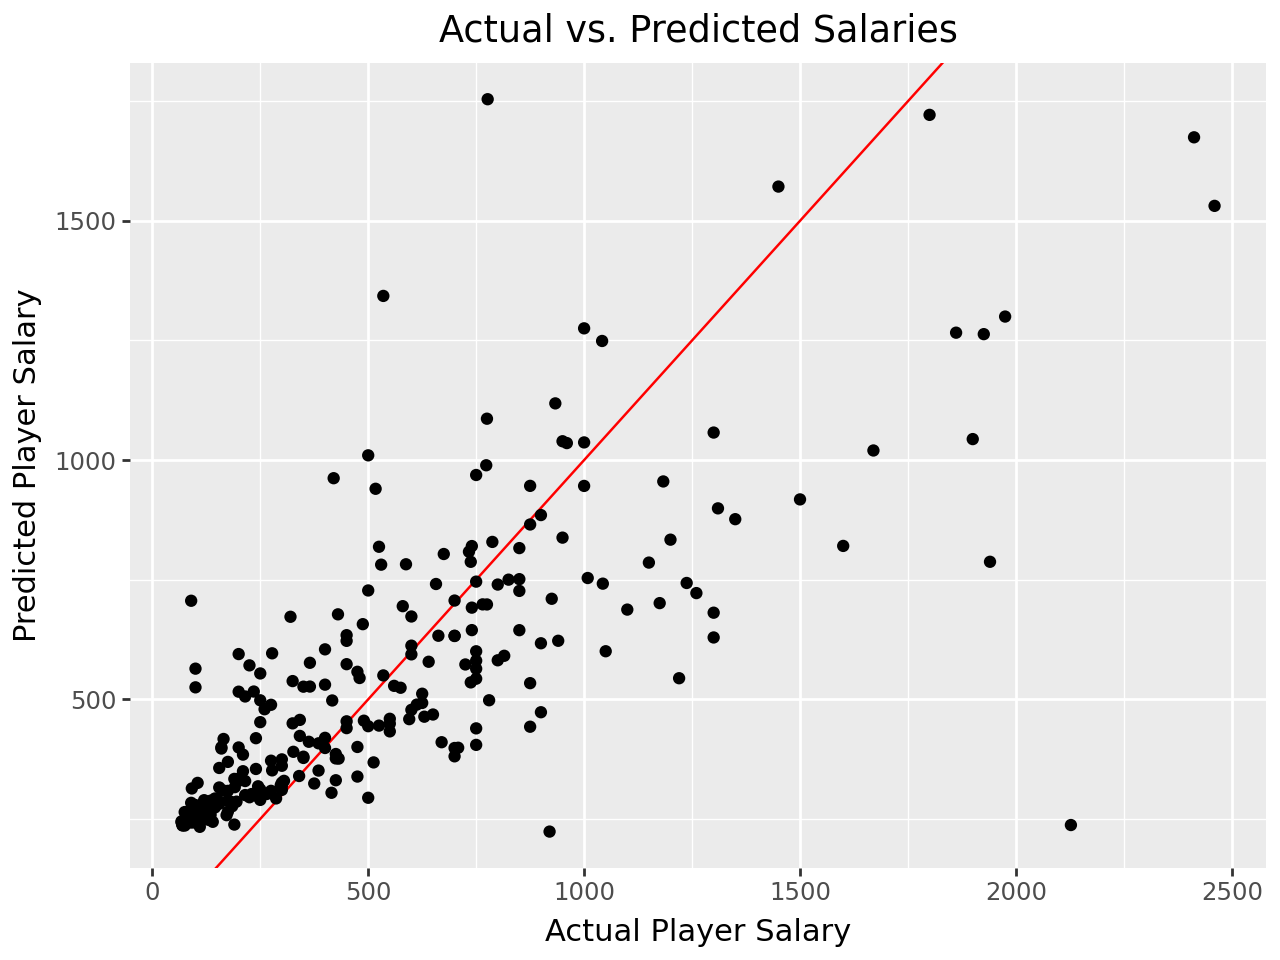

In [268]:
from plotnine import ggplot, aes, geom_point, geom_abline, labs

plot_data = pd.DataFrame({
    'Actual_Salary': y,
    'Predicted_Salary': Pipelineelasticinter.predict(X)
})
min_val = min(plot_data['Actual_Salary'].min(), plot_data['Predicted_Salary'].min())
max_val = max(plot_data['Actual_Salary'].max(), plot_data['Predicted_Salary'].max())

plot = (
    ggplot(plot_data, aes(x='Actual_Salary', y='Predicted_Salary'))
    + geom_abline(intercept=0, slope=1, color='red')
    + geom_point()

    + labs(
        x='Actual Player Salary',
        y='Predicted Player Salary',
        title= 'Actual vs. Predicted Salaries',
    )
)
plot